# 비음수 행렬 분해 (NMF: Non-negative Matrix Factorization) 실습

---

**Non-negative Matrix Factorization**

행렬 내 모든 원소값이 0보다 큰 경우에 사용할 수 있는 행렬 분해 방법이다. 

비음수 행렬 분해는 데이터 행렬 $X $가 주어질 때 다음 조건을 만족하는 비음수 행렬 $U, V$ 를 찾는 알고리즘이다.

$$ X = UV $$

$X$의 차원을 $n \times p$라고 하면 행렬 $U$는 $n \times d$이며 $V$의 차원은 $d \times p$인 것이다. 

이때 $d$는 $n, p$보다 작은 숫자를 선택한다. 그리고 행렬 $U, V$의 원소가 비음수이므로 비음수 행렬 분해라는 이름이 붙은 것이다.

> 행렬 형태로 표현할 수도 있지만, 벡터 형태로 표현할 수도 있다. 그렇다면 이렇게 쓸 수 있다.
         $$ \mathbf{x}_i = U \mathbf{v}_i $$
         위 식에서 $\mathbf{x}_i$ 는 데이터 행렬 $X$의 벡터에 해당하고, $\mathbf{v}_i$는 $V$의 벡터이다. 
         즉 데이터 행렬 X의 벡터 $\mathbf{x}_i$는 행렬 $U$의 각 열에 가중치 $\mathbf{v}_i$를 적용한 **선형 결합 형태**라고 생각할 수 있다.
         행렬 $U$는 데이터 행렬 $X$의 근사 기저라고 생각할 수 있는데, 행렬 $U$의 차원은 $X$보다 작았다. 
         이는 데이터 행렬 $X$를 표현하는 데 상대적으로 크기가 작은 수의 **기저 벡터**로 표현할 수 있다는 의미이다.
         동일한 크기의 데이터 행렬을 표현하는 데에는 더 작은 수의 기저 벡터를 사용할 수록 성능이 뛰어나다고 할 수 있다.
         
> 비용함수는 유클리디안 거리를 사용하는데, 작을수록 높은 성능을 의미하고, 0이 되면 최고의 성능이라는 것이다. 즉 비음수 행렬 분해는 비용 함수를 최소화하는 행렬 $U, V$를 찾는 것이다.

---
##### 알고리즘
1. 비음수 행렬 $U, V$를 초기화한다.
2. $ n+1 $번째 비음수 행렬 $U, V$를 구한다.
3. 비용 함수를 이용해 비용을 구한다.
4. 2-3번 과정을 반복한다.
---
##### 10.6.3 NMF를 활용하여 사람 얼굴의 특징 요소를 추출하는 모형을 만들어본다.

# Dataset import
## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
raw_face = datasets.fetch_lfw_people(min_faces_per_person = 20, resize = 0.5, color = False)

데이터셋 이름: fetch_lfw_people

사람 별 최소 얼굴 개수: min_faces_per_person

사이즈 조정 정도: resize

컬러 표시 여부: color

불러오는데 조금 시간이 걸렸다. 2분 정도?

## 데이터 살펴보기 및 X, y 지정

In [4]:
# 데이터 살펴보기1: 얼굴 데이터 개수

n_samples, h, w = raw_face.images.shape
print(n_samples)

3023


In [5]:
# 데이터 살펴보기2: 각 이미지의 높이와 가로

print(h, w)

62 47


In [6]:
# 데이터 살펴보기3: 데이터 행렬 X의 차원

X = raw_face.data
n, p = X.shape

print(n, p)

3023 2914


행 개수가 3023인 이유는 모든 얼굴 데이터가 3023개이기 때문이고, 열 개수가 2914인 이유는 62*47 이미지 데이터 행렬을 일렬로 늘어뜨렸기 때문이다.

In [7]:
# 데이터 살펴보기4: 

y = raw_face.target
target_names = raw_face.target_names
k = target_names.shape[0]
print(k)

62


타깃 데이터 y의 이름은 target_names이다. target data의 클래스 개수는 k로, 얼굴 종류는 총 62개이다. 

3023는 62명의 사진이라는 소리인 것인다!

# 트레이닝, 테스트 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 1)

# 비음수 행렬 분해 실행

In [9]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 10, random_state = 0)
nmf.fit(X_tn)
X_tn_nmf = nmf.transform(X_tn)
X_te_nmf = nmf.transform(X_te)

/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


```
FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
```

오류가 떴는데, 바뀐다고 하는 부분이 정확히 어느 부분인지는 모르지만 parameter 중에 init = 'warn' 이 default로 되어있다. 이 부분이 바뀔 예정이라고 하는 것 같다.
그리고 맥시멉 iterations200에 닿아서 수렴을 개선하려면 이것을 올리라고 적혀있다. 일단 완전 Error가 뜬 것이 아니니 진행해본다.

# 오리지널 데이터 시각화



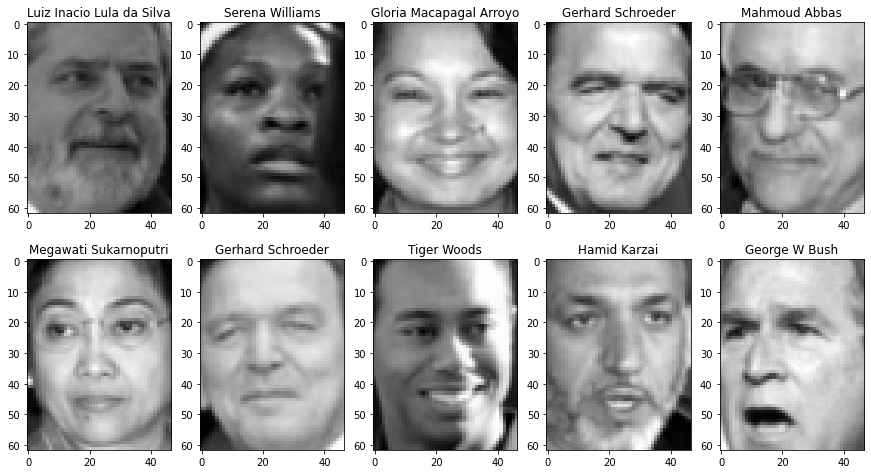

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))                # 그림 사이즈
plt.gray()                                  # 흑백

for i in range(2*5):                        # 10개만 그려보기로
    plt.subplot(2, 5, i+1)                  # 2행 5열의 형태로 나타나게 한다
    plt.imshow(X_tn[i].reshape((h, w)))     # 얼굴 데이터를 그리는데, reshape로 그림의 크기를 조정할 수 있다. h,w 므로 원본 데이터처럼 그린다.
    plt.title(target_names[y_tn[i]])        # 각 얼굴의 제목(얼굴의 이름, target_data)

plt.show()

## 비음수 행렬 분해 요소 시각화

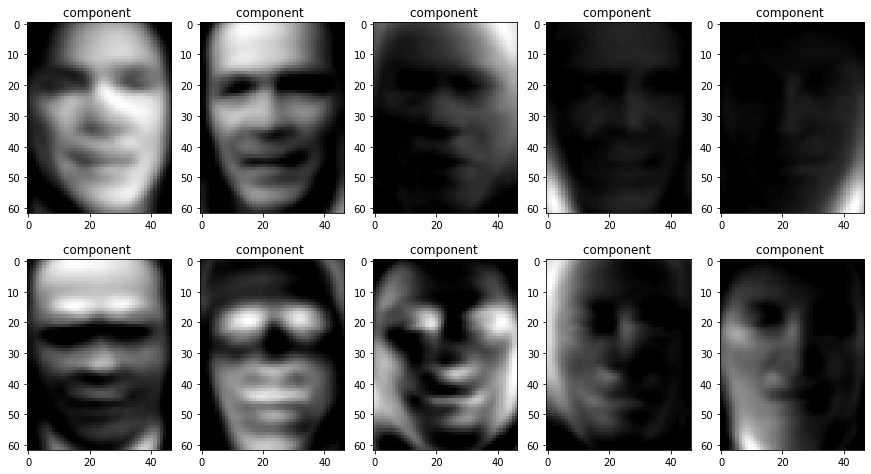

In [11]:
plt.figure(figsize = (15,8))                # 그림 사이즈
plt.gray()                                  # 흑백

for i in range(2*5):                        # 10개만 그려보기로
    plt.subplot(2, 5, i+1)                  # 2행 5열의 형태로 나타나게 한다
    plt.imshow(nmf.components_[i].reshape((h, w)))     # 행렬분해 요소로 얼굴 데이터를 그린다.
    plt.title("component ".format(i))

plt.show()

으아 무서워... 무튼 이렇게 간단하게 만들어서도 사람의 얼굴을 이렇게 표현할 수 있음을 확인할 수 있었다.